In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols as sm_ols
from statsmodels.iolib.summary2 import summary_col # nicer tables
import matplotlib.pyplot as plt

In [2]:
merged = pd.read_csv("./inputs/merged.csv")

In [3]:
merged

,Year,Period,Label,SP500_Return,Percent_Change_in_GDP,CPI,Construction_Unemployment_Rate,Manufacturing_Unemployment_Rate,Finance_Unemployment_Rate
0,2005,Q01,2005 Qtr1,-0.0259,4.5,192.366667,11.4,5.3,2.6
1,2005,Q02,2005 Qtr2,0.0091,2.0,193.666667,6.4,4.6,3.2
2,2005,Q03,2005 Qtr3,0.0315,3.2,196.600000,5.6,4.9,3.2
3,2005,Q04,2005 Qtr4,0.0159,2.3,198.433333,6.4,4.8,2.5
4,2006,Q01,2006 Qtr1,0.0373,5.5,199.466667,8.7,4.5,2.6
...,...,...,...,...,...,...,...,...,...
67,2021,Q04,2021 Qtr4,0.1040,7.0,278.706667,4.6,3.1,2.2
68,2022,Q01,2022 Qtr1,-0.0518,-1.6,284.893667,6.6,3.3,2.1
69,2022,Q02,2022 Qtr2,-0.1663,-0.6,291.535667,4.0,3.0,1.5
70,2022,Q03,2022 Qtr3,-0.0517,3.2,295.495667,3.6,3.1,1.2


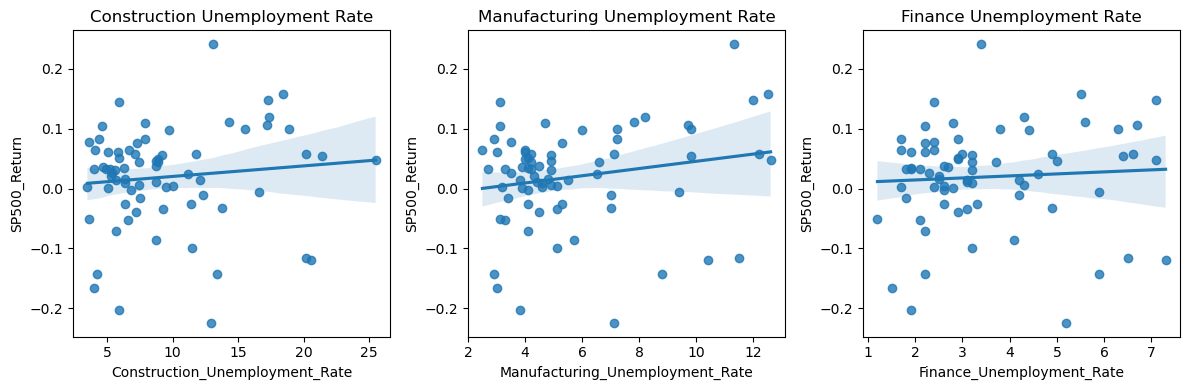

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.regplot(x='Construction_Unemployment_Rate', y='SP500_Return', data=merged, ax=axes[0])
axes[0].set_title('Construction Unemployment Rate')

sns.regplot(x='Manufacturing_Unemployment_Rate', y='SP500_Return', data=merged, ax=axes[1])
axes[1].set_title('Manufacturing Unemployment Rate')

sns.regplot(x='Finance_Unemployment_Rate', y='SP500_Return', data=merged, ax=axes[2])
axes[2].set_title('Finance Unemployment Rate')

plt.tight_layout()

plt.show()

In [5]:
SP500_CUR = sm_ols('SP500_Return ~ np.log(Construction_Unemployment_Rate)', data = merged).fit()

In [6]:
SP500_MUR = sm_ols('SP500_Return ~ np.log(Manufacturing_Unemployment_Rate)', data = merged).fit()

In [7]:
SP500_FUR =  sm_ols('SP500_Return ~ np.log(Finance_Unemployment_Rate)', data = merged).fit()

In [8]:
SP500_UR =  sm_ols('SP500_Return ~ np.log(Construction_Unemployment_Rate) + np.log(Manufacturing_Unemployment_Rate) + np.log(Finance_Unemployment_Rate)', data = merged).fit()

In [9]:
info_dict={'No. observations' : lambda x: f"{int(x.nobs):d}"}
info_dict={'No. observations' : lambda x: "{:,.0f}".format(x.nobs)}
table = summary_col(results=[SP500_CUR,SP500_MUR,SP500_FUR,SP500_UR],
                    float_format='%0.2f',
                    stars = True,
                    model_names=['SP500_CUR','SP500_MUR','SP500_FUR','SP500_UR'],
                    info_dict=info_dict,
                    regressor_order=['Intercept','Construction_Unemployment_Rate','Manufacturing_Unemployment_Rate','Finance_Unemployment_Rate'],
                   
                   )
table.add_title('OLS Regressions of S&P 500 Return')
print(table)

                      OLS Regressions of S&P 500 Return
                                        SP500_CUR SP500_MUR SP500_FUR SP500_UR
------------------------------------------------------------------------------
Intercept                               -0.02     -0.04     -0.00     -0.03   
                                        (0.04)    (0.04)    (0.03)    (0.05)  
np.log(Construction_Unemployment_Rate)  0.02                          -0.04   
                                        (0.02)                        (0.05)  
np.log(Finance_Unemployment_Rate)                           0.02      -0.03   
                                                            (0.02)    (0.05)  
np.log(Manufacturing_Unemployment_Rate)           0.03                0.11    
                                                  (0.02)              (0.07)  
R-squared                               0.01      0.03      0.01      0.05    
R-squared Adj.                          -0.00     0.02      -0.00     0.01 

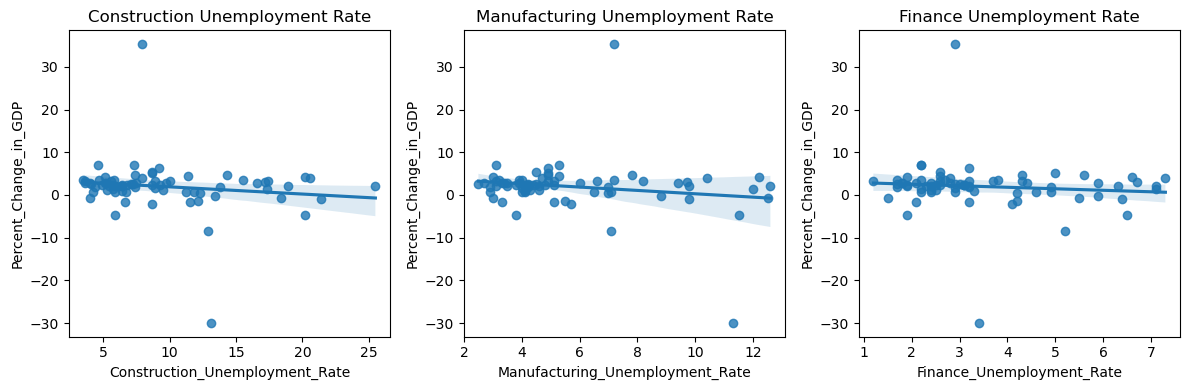

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.regplot(x='Construction_Unemployment_Rate', y='Percent_Change_in_GDP', data=merged, ax=axes[0])
axes[0].set_title('Construction Unemployment Rate')

sns.regplot(x='Manufacturing_Unemployment_Rate', y='Percent_Change_in_GDP', data=merged, ax=axes[1])
axes[1].set_title('Manufacturing Unemployment Rate')

sns.regplot(x='Finance_Unemployment_Rate', y='Percent_Change_in_GDP', data=merged, ax=axes[2])
axes[2].set_title('Finance Unemployment Rate')

plt.tight_layout()

plt.show()

In [11]:
GDP_CUR = sm_ols('Percent_Change_in_GDP ~ np.log(Construction_Unemployment_Rate)', data = merged).fit()

In [12]:
GDP_MUR = sm_ols('Percent_Change_in_GDP ~ np.log(Manufacturing_Unemployment_Rate)', data = merged).fit()

In [13]:
GDP_FUR =  sm_ols('Percent_Change_in_GDP ~ np.log(Finance_Unemployment_Rate)', data = merged).fit()

In [14]:
GDP_UR =  sm_ols('Percent_Change_in_GDP ~ np.log(Construction_Unemployment_Rate) + np.log(Manufacturing_Unemployment_Rate) + np.log(Finance_Unemployment_Rate)', data = merged).fit()

In [15]:
info_dict2={'No. observations' : lambda x: f"{int(x.nobs):d}"}
info_dict2={'No. observations' : lambda x: "{:,.0f}".format(x.nobs)}
table2 = summary_col(results=[GDP_CUR,GDP_MUR,GDP_FUR,GDP_UR],
                    float_format='%0.2f',
                    stars = True,
                    model_names=['GDP_CUR','GDP_MUR','GDP_FUR','GDP_UR'],
                    info_dict=info_dict,
                    regressor_order=['Intercept','Construction_Unemployment_Rate','Manufacturing_Unemployment_Rate','Finance_Unemployment_Rate'],
                   
                   )
table2.add_title('OLS Regressions of Percent Change in GDP')
print(table2)

               OLS Regressions of Percent Change in GDP
                                        GDP_CUR GDP_MUR GDP_FUR GDP_UR
----------------------------------------------------------------------
Intercept                               5.64*   5.22*   3.48*   6.85* 
                                        (3.05)  (2.82)  (2.01)  (3.53)
np.log(Construction_Unemployment_Rate)  -1.72                   -2.27 
                                        (1.40)                  (4.02)
np.log(Finance_Unemployment_Rate)                       -1.30   2.69  
                                                        (1.63)  (3.81)
np.log(Manufacturing_Unemployment_Rate)         -1.97           -1.91 
                                                (1.67)          (4.94)
R-squared                               0.02    0.02    0.01    0.03  
R-squared Adj.                          0.01    0.01    -0.01   -0.01 
No. observations                        72      72      72      72    
Standard errors in pa

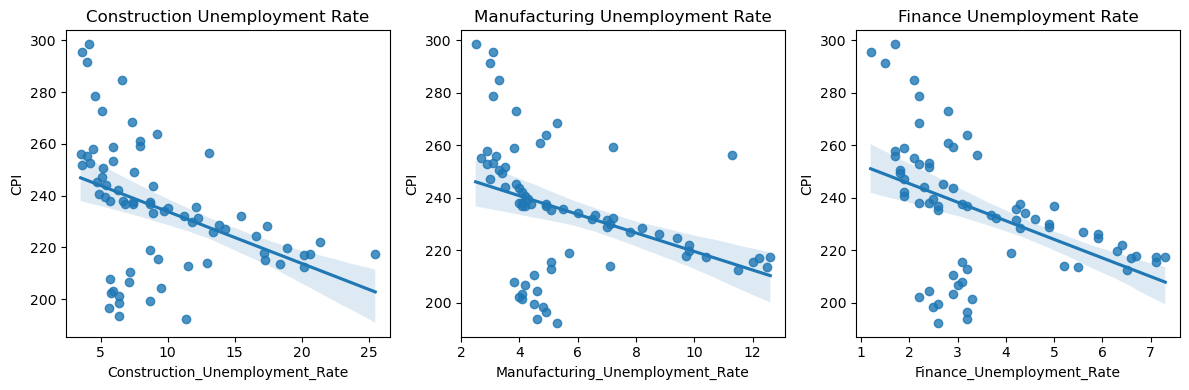

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.regplot(x='Construction_Unemployment_Rate', y='CPI', data=merged, ax=axes[0])
axes[0].set_title('Construction Unemployment Rate')

sns.regplot(x='Manufacturing_Unemployment_Rate', y='CPI', data=merged, ax=axes[1])
axes[1].set_title('Manufacturing Unemployment Rate')

sns.regplot(x='Finance_Unemployment_Rate', y='CPI', data=merged, ax=axes[2])
axes[2].set_title('Finance Unemployment Rate')

plt.tight_layout()

plt.show()

In [17]:
CPI_CUR = sm_ols('CPI ~ np.log(Construction_Unemployment_Rate)', data = merged).fit()

In [18]:
CPI_MUR = sm_ols('CPI ~ np.log(Manufacturing_Unemployment_Rate)', data = merged).fit()

In [19]:
CPI_FUR =  sm_ols('CPI ~ np.log(Finance_Unemployment_Rate)', data = merged).fit()

In [20]:
CPI_UR =  sm_ols('CPI ~ np.log(Construction_Unemployment_Rate) + np.log(Manufacturing_Unemployment_Rate) + np.log(Finance_Unemployment_Rate)', data = merged).fit()

In [21]:
info_dict3={'No. observations' : lambda x: f"{int(x.nobs):d}"}
info_dict3={'No. observations' : lambda x: "{:,.0f}".format(x.nobs)}
table3 = summary_col(results=[CPI_CUR,CPI_MUR,CPI_FUR,CPI_UR],
                    float_format='%0.2f',
                    stars = True,
                    model_names=['CPI_CUR','CPI_MUR','CPI_FUR','CPI_UR'],
                    info_dict=info_dict,
                    regressor_order=['Intercept','Construction_Unemployment_Rate','Manufacturing_Unemployment_Rate','Finance_Unemployment_Rate'],
                   
                   )
table3.add_title('OLS Regressions of CPI')
print(table3)

                            OLS Regressions of CPI
                                         CPI_CUR   CPI_MUR   CPI_FUR    CPI_UR 
-------------------------------------------------------------------------------
Intercept                               284.61*** 278.65*** 269.29*** 271.13***
                                        (11.03)   (10.35)   (7.00)    (12.39)  
np.log(Construction_Unemployment_Rate)  -23.46***                     -8.72    
                                        (5.06)                        (14.11)  
np.log(Finance_Unemployment_Rate)                           -29.90*** -29.57** 
                                                            (5.69)    (13.36)  
np.log(Manufacturing_Unemployment_Rate)           -26.73***           9.94     
                                                  (6.12)              (17.34)  
R-squared                               0.23      0.21      0.28      0.29     
R-squared Adj.                          0.22      0.20      0.27     